In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def grid_dirichlet1D(a, b, Nx):
    return np.linspace(a, b, Nx)

In [25]:
def grid_offset(a, b, Nx):
    dx = (b-a)/Nx
    x = [a]
    for j in range(1, Nx):
        x.append((j-0.5)*dx)
    return np.array(x)

In [6]:
def init_bell(d0, x): #To make a kind of bell curve -> continuous ditribution centered in d0
    ret = []
    for i in range(x.size):
        if x[i] > d0-0.2 and x[i] < d0+0.2:
            ret.append(np.exp(-2/(1-(np.sin(2*np.pi*(x[i]-d0))**2))))
        else:
            ret.append(0)
    return np.array(ret)

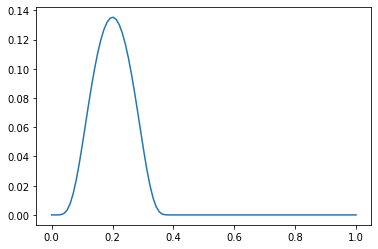

In [7]:
x = np.linspace(0,1,100)
plt.plot(x, init_bell(0.2, x))

In [8]:
def init_jump(d0, x): #To make a piecewise-constant function with a discontinuity in d0 (1 before, 0 after)
    u = np.zeros_like(x, dtype=float)
    for i in range(u.shape[0]):
       if (x[i]<d0):
           u[i] = 1
    return u

In [9]:
def exact(init, params, x, tf):
    tf = np.ones_like(x)*tf
    x0 = x-tf
    u0 = init(params, x0)

    return u0

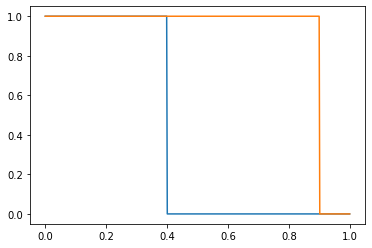

In [10]:
a, b = 0, 1 #Domain in [0,1]
Nx = 500

dx = (b-a)/Nx
x = grid_dirichlet1D(a, b, Nx)
u0 = init_jump(0.4, x)
ue = exact(init_jump, 0.4, x, 0.5)

plt.plot(x, u0)
plt.plot(x, ue) #Exact solution

In [32]:
#Here is a function to compute a step of a simple scheme like upwind, downwind, centered,...
def matmul_step_periodical(u_n, Beta, A):
    ret = u_n
    ret[0] = u_n[0] - Beta*(u_n[0] - u_n[-1]) #Periodical domain
    ret[1:] = - Beta*np.dot(A[1:,1:], u_n[1:])
    return ret

In [33]:
def T(Nx):  #Matrix for Upwind Scheme
    return np.eye(Nx) + np.diag(-1 * np.ones(Nx-1), -1)

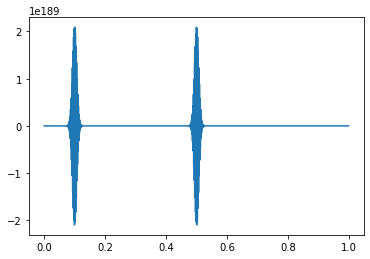

In [34]:
#Finite Differences:

a, b = 0, 1
Nx = 1000
dx = (b-a)/Nx
dt = 5*dx #CFL condition = 5
Beta = dt/dx
x = grid_offset(a, b, Nx)
u_n = init_bell(0.2, x)
t=0
A = T(Nx)
I = np.eye(Nx)

tf = 1
while t < tf:
    u_n = matmul_step_periodical(u_n, Beta, A)
    t += dt

plt.plot(x, u_n)

In [ ]:
def h(u_i0, u_i1, dx):
    return (u_i1 - u_i0)/dx

In [ ]:
def F(uL, uR, a):
    return a * (uL + uR / 2) + np.abs(a) * (uR - uL) / 2

In [ ]:
def f(u, a):
    return a*u

In [ ]:
def ThetaScheme(theta, a, u, grid_t, grid_x): #We assume that dt and dx are constants
    Nt = grid_t.size
    dt = (grid_t[-1]-grid_t[0])/Nt
    Nx = grid_x.size
    dx = (grid_x[-1]-grid_x[0])/Nx

    for i in range(Nx):
        #With a periodic domain
        #u[i] -= (dt/dx)